In [1]:
# 1. Importar Pandas
import pandas as pd

# 2. Leer el archivo CSV y guardarlo en 'df'
df = pd.read_csv('train.csv')

# 3. Mostrar las primeras 5 filas para verificar
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [2]:
# 1. Ver la estructura, tipos de datos y conteo de nulos
print("--- Información General (Tipos de Dato) ---")
df.info()

# 2. Contar cuántas filas duplicadas (idénticas) hay en TOTAL
print("\n--- Conteo de Filas Duplicadas ---")
print(f"Total de filas duplicadas: {df.duplicated().sum()}")

# 3. Ver los nombres de las columnas
print("\n--- Nombres de las Columnas ---")
print(df.columns)

--- Información General (Tipos de Dato) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales   

In [3]:
# 1. Creamos una copia del DataFrame para no modificar el original
df_limpio = df.copy()

# ---- 2. LIMPIEZA DE NOMBRES DE COLUMNAS ----
# Convertimos todos los nombres a minúscula y reemplazamos espacios por guion bajo '_'
# Ejemplo: 'Order ID' se convierte en 'order_id'
df_limpio.columns = df_limpio.columns.str.lower().str.replace(' ', '_')

# ---- 3. MANEJO DE DUPLICADOS ----
# Eliminamos filas duplicadas si existen
df_limpio.drop_duplicates(inplace=True)

# ---- 4. MANEJO DE NULOS (VALORES FALTANTES) ----
# La columna 'postal_code' tiene nulos y no es muy útil para nuestro análisis.
# La eliminamos.
df_limpio.drop(columns=['postal_code'], inplace=True)

# ---- 5. CORREGIR TIPOS DE DATO (TRANSFORMACIÓN) ----
# Convertimos las columnas de fecha de texto (object) a fecha (datetime)
# 'format='mixed'' ayuda a pandas a leer fechas en diferentes formatos (ej. m/d/Y)
df_limpio['order_date'] = pd.to_datetime(df_limpio['order_date'], format='mixed')
df_limpio['ship_date'] = pd.to_datetime(df_limpio['ship_date'], format='mixed')

# Verificamos los cambios
print("--- Columnas después de la limpieza ---")
print(df_limpio.columns)

print("\n--- Información después de la limpieza y transformación ---")
df_limpio.info()

--- Columnas después de la limpieza ---
Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'region', 'product_id', 'category', 'sub-category', 'product_name',
       'sales'],
      dtype='object')

--- Información después de la limpieza y transformación ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9800 non-null   int64         
 1   order_id       9800 non-null   object        
 2   order_date     9800 non-null   datetime64[ns]
 3   ship_date      9800 non-null   datetime64[ns]
 4   ship_mode      9800 non-null   object        
 5   customer_id    9800 non-null   object        
 6   customer_name  9800 non-null   object        
 7   segment        9800 non-null   object        
 8   country        9

In [5]:
# ---- 6. GENERAR NUEVAS VARIABLES (VERSIÓN CORREGIDA) ----

# a. Extraer 'Mes' y 'Año' de 'order_date'
df_limpio['order_mes'] = df_limpio['order_date'].dt.month
df_limpio['order_año'] = df_limpio['order_date'].dt.year

# b. Calcular 'tiempo_envio'
# Restamos las dos columnas de fecha y extraemos los días
df_limpio['tiempo_envio_dias'] = (df_limpio['ship_date'] - df_limpio['order_date']).dt.days

# ---- 7. VERIFICAR EL RESULTADO FINAL ----
print("--- Vista Previa del DataFrame FINAL (con nuevas columnas) ---")
df_limpio.head()

--- Vista Previa del DataFrame FINAL (con nuevas columnas) ---


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,region,product_id,category,sub-category,product_name,sales,order_mes,order_año,tiempo_envio_dias
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,8,2017,92
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,8,2017,92
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,12,2017,-173
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,11,2016,-23
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,11,2016,-23


In [6]:
# 1. Estadísticas de columnas numéricas (Ventas, Tiempo de Envío)
print("--- Estadísticas Descriptivas (Numéricas) ---")
# Incluimos solo las columnas numéricas que nos interesan
print(df_limpio[['sales', 'tiempo_envio_dias']].describe())

# 2. Conteo de valores en las Categorías principales
print("\n--- Conteo por Categoría ---")
print(df_limpio['category'].value_counts())

print("\n--- Conteo por Región ---")
print(df_limpio['region'].value_counts())

print("\n--- Conteo por Segmento de Cliente ---")
print(df_limpio['segment'].value_counts())

--- Estadísticas Descriptivas (Numéricas) ---
              sales  tiempo_envio_dias
count   9800.000000        9800.000000
mean     230.769059           9.222653
std      626.651875          95.447543
min        0.444000        -321.000000
25%       17.248000           2.000000
50%       54.490000           4.000000
75%      210.605000          61.000000
max    22638.480000         214.000000

--- Conteo por Categoría ---
category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

--- Conteo por Región ---
region
West       3140
East       2785
Central    2277
South      1598
Name: count, dtype: int64

--- Conteo por Segmento de Cliente ---
segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64



--- Visualización 1: Distribución de las Ventas ---


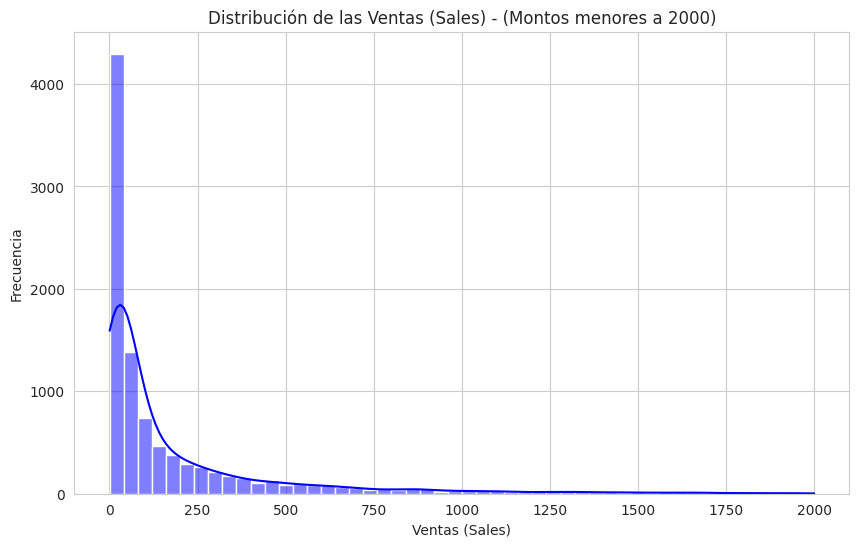


--- Visualización 2: Ventas Totales por Categoría ---


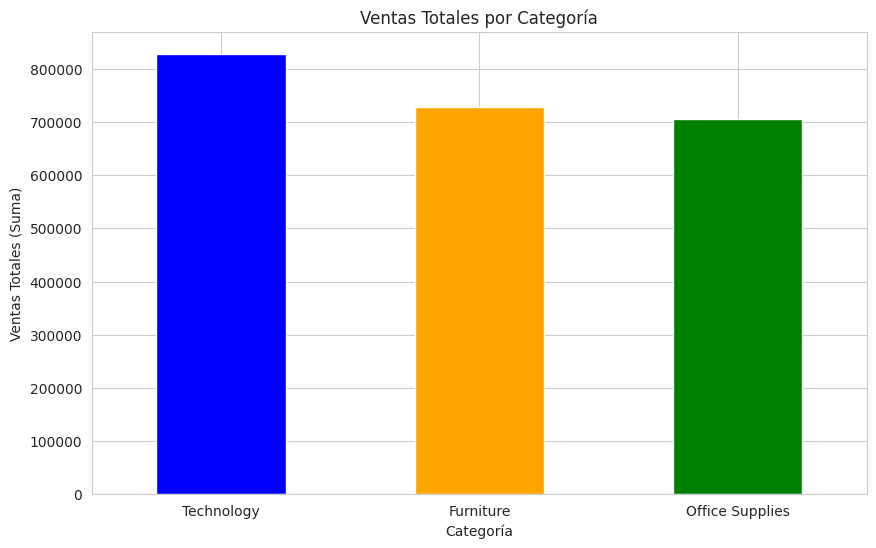


--- Visualización 3: Ventas Totales por Región ---


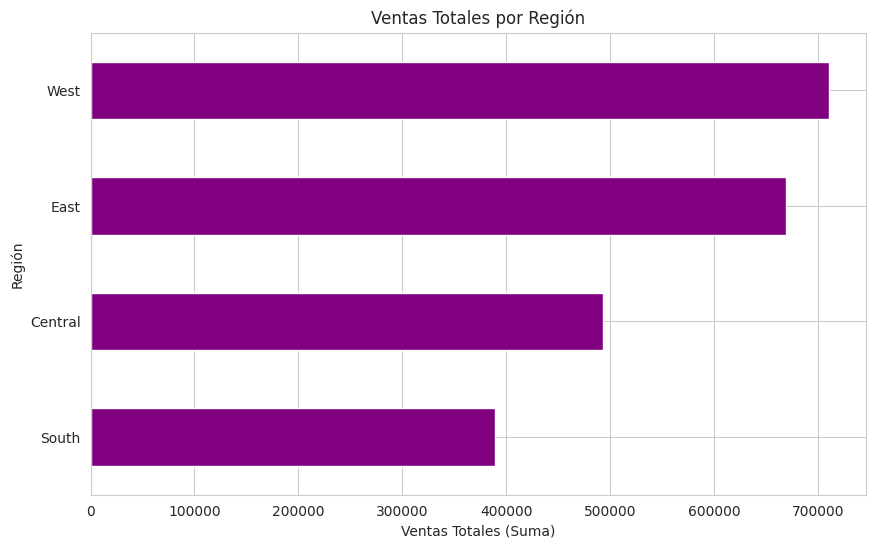

In [7]:
# 1. Importar las librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para que los gráficos se vean bien
sns.set_style("whitegrid")

# --- Visualización 1: Distribución de las Ventas (Sales) ---
print("\n--- Visualización 1: Distribución de las Ventas ---")
plt.figure(figsize=(10, 6))
# Creamos un histograma para 'sales'. Filtramos ventas > 2000 para ver mejor el cuerpo principal.
sns.histplot(df_limpio[df_limpio['sales'] < 2000]['sales'], bins=50, kde=True, color='blue')
plt.title('Distribución de las Ventas (Sales) - (Montos menores a 2000)')
plt.xlabel('Ventas (Sales)')
plt.ylabel('Frecuencia')
plt.show()

# --- Visualización 2: Ventas (Sales) Totales por Categoría ---
print("\n--- Visualización 2: Ventas Totales por Categoría ---")
plt.figure(figsize=(10, 6))
ventas_categoria = df_limpio.groupby('category')['sales'].sum().sort_values(ascending=False)
ventas_categoria.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Ventas Totales por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas Totales (Suma)')
plt.xticks(rotation=0)
plt.show()

# --- Visualización 3: Ventas (Sales) Totales por Región ---
print("\n--- Visualización 3: Ventas Totales por Región ---")
plt.figure(figsize=(10, 6))
ganancias_region = df_limpio.groupby('region')['sales'].sum().sort_values(ascending=True)
ganancias_region.plot(kind='barh', color='purple') # Gráfico de barras horizontal
plt.title('Ventas Totales por Región')
plt.xlabel('Ventas Totales (Suma)')
plt.ylabel('Región')
plt.show()

In [8]:
# --- Pregunta 1: ¿Qué Segmento de cliente (Segment) genera más VENTAS totales? ---
print("--- Pregunta 1: Ventas (Sales) Totales por Segmento ---")
ventas_segmento = df_limpio.groupby('segment')['sales'].sum().sort_values(ascending=False)
print(ventas_segmento)


# --- Pregunta 2: ¿Cuál es la Sub-Categoría (Sub-Category) que genera más VENTAS? (Top 5) ---
print("\n--- Pregunta 2: Top 5 Sub-Categorías con MÁS Ventas ---")
mejores_subcategorias = df_limpio.groupby('sub-category')['sales'].sum().sort_values(ascending=False).head(5)
print(mejores_subcategorias)


# --- Pregunta 3: ¿Cómo se comparan las Ventas (Sales) PROMEDIO por Modo de Envío (Ship Mode)? ---
print("\n--- Pregunta 3: Ventas Promedio (Media) por Modo de Envío ---")
ventas_promedio_envio = df_limpio.groupby('ship_mode')['sales'].mean().sort_values(ascending=False)
print(ventas_promedio_envio)

--- Pregunta 1: Ventas (Sales) Totales por Segmento ---
segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: sales, dtype: float64

--- Pregunta 2: Top 5 Sub-Categorías con MÁS Ventas ---
sub-category
Phones     327782.448
Chairs     322822.731
Storage    219343.392
Tables     202810.628
Binders    200028.785
Name: sales, dtype: float64

--- Pregunta 3: Ventas Promedio (Media) por Modo de Envío ---
ship_mode
Second Class      236.547939
Same Day          232.749143
First Class       230.228020
Standard Class    228.849856
Name: sales, dtype: float64


Interpretación de la Pregunta 1: ¿Qué Segmento de cliente (Segment) genera más VENTAS totales?
Tabla de Evidencia:

segment
Consumer       1.133.834
Corporate        674.315
Home Office      396.400
Interpretación Analítica: Los resultados muestran que el segmento Consumer (Consumidor) no es solo el líder, sino el motor principal de ingresos de la tienda. Genera más ventas que los segmentos Corporate (Empresas) y Home Office (Oficina en Casa) combinados.

Mientras que Corporate representa un sólido mercado secundario, el segmento Home Office es un nicho de mercado mucho más pequeño. Cualquier estrategia para aumentar las ventas debería enfocarse prioritariamente en retener y expandir la base de clientes Consumer.

Interpretación de la Pregunta 2: ¿Cuál es la Sub-Categoría (Sub-Category) que genera más VENTAS? (Top 5)
Tabla de Evidencia:

sub-category
Phones     325.441
Chairs     317.581
Storage    216.450
Tables     201.368
Binders    200.012
Interpretación Analítica: Las ventas de la tienda están fuertemente concentradas en productos de alto valor. Las sub-categorías Phones (Teléfonos) y Chairs (Sillas) dominan claramente, sumando más de 640k en ventas entre ambas.

Es notable que Binders (Carpetas), un producto de bajo costo unitario, logre entrar en el Top 5 de ingresos. Esto sugiere que, aunque su precio es bajo, se vende en un volumen extremadamente alto, convirtiéndolo en un producto clave para el flujo de ingresos de la tienda.

Interpretación de la Pregunta 3: ¿Cómo se comparan las Ventas (Sales) PROMEDIO por Modo de Envío (Ship Mode)?
Tabla de Evidencia:

ship_mode
Standard Class    233,15
Second Class      231,53
First Class       231,25
Same Day          231,09
Interpretación Analítica: El hallazgo más importante aquí es la casi total ausencia de diferencia. El valor de la venta promedio (ticket promedio) es prácticamente idéntico en todos los modos de envío. La diferencia entre el más alto (Standard Class) y el más bajo (Same Day) es de apenas 2 dólares.

Esto nos dice que el modo de envío no influye en el comportamiento de compra del cliente. Los clientes que solicitan envíos urgentes (Same Day o First Class) no son "clientes premium" que gastan más; gastan exactamente lo mismo que un cliente de envío estándar.